# Capstone Project: Classification Model <br>

#### Brandie Hatch

### Modeling

- Imports, Data Reading, Model Prep
- Modeling
- Model Evaluation

#### Performing two types of models:
1. Clustering / k-Means to see if there are any interesting patterns in the data
2. Supervised Classification - likely a combination of Logistic Regression, Random Forest, Decision Trees, Naive Bayes, and SVM to see which one performs the best at accurately predicting male or female based on education attainment, labor types, income, etc.

## Imports, Data Reading, and Model Prep

In [74]:
# python library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC, SVC 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


%matplotlib inline
pd.options.display.max_columns =999


In [75]:
# Read in Data

df = pd.read_csv('./data/data_clean.csv', index_col=False)
print(df.shape)
df.head()

(3239553, 26)


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
0,35,1,1,0,6,0,2,1,0,-1,6250,63000,-1,1,1,0,17,0,0,0,1,63000,0,1,0,18
1,25,1,0,0,6,0,2,5,0,-1,9,0,-1,1,1,0,12,0,0,0,1,0,0,3,0,48
2,21,5,2,0,1,0,2,5,0,-1,4740,2000,-1,6,3,15,19,0,0,0,2,2000,0,1,0,18
3,49,1,1,0,6,0,2,3,0,-1,110,0,-1,1,1,0,21,1,2,0,1,0,0,2,0,4
4,18,1,1,0,6,0,2,5,0,-1,4110,6000,-1,1,2,15,16,0,0,0,2,6000,0,1,2,6


In [76]:
# Tried modeling, but fit would not work because I do not have enough memory. Tried Google Collab to run the fit, but it also did not have the memory to do the work.
# Decided to take my 8 million + observations and reduce them down to a lower number using pandas random sample.
# Returns a new object of same type as caller containing n items randomly sampled from the caller object. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

df = df.sample(n=10000, replace=False, axis=0, ignore_index=True, random_state=42)
print(df.shape)
df.head()

(10000, 26)


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
0,49,1,0,0,6,0,2,3,1,2,9,27800,136,1,1,0,19,0,0,0,1,0,12,3,2,26
1,70,1,0,0,6,0,2,2,1,0,9,38000,442,1,1,0,13,0,0,0,1,0,12,3,2,42
2,58,1,1,0,1,0,2,1,1,0,410,89000,501,1,1,0,16,0,0,0,1,89000,1,1,1,36
3,76,1,0,0,6,0,2,2,1,0,9,96400,501,1,1,0,21,2,2,0,1,0,0,3,2,17
4,57,1,0,0,6,0,2,3,1,0,9,9700,73,1,1,0,16,0,0,0,1,0,0,3,2,39


In [4]:
# Returns the root mean squared error from y and y predictions of models
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [77]:
# Create X and y 

X = df.drop(columns=['SEX', 'FFSP', 'LANX', 'NOC', 'RAC1P', 'SCH', 'SCHG'])
y = df['SEX']

In [78]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [79]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [80]:
# calculate the baseline accuracy (% of the majority class, Male)
# benchmark to beat is .509706
y.value_counts(normalize=True)

2    0.5049
1    0.4951
Name: SEX, dtype: float64

## Modeling

Here is my hypothesis for how to make the story work. Then how changes were made

In [9]:
lr = LogisticRegression()
lr.fit(Xs_train, y_train)

LogisticRegression()

In [10]:
logreg_y_pred = lr.predict(X)

c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [11]:
rmse(y, logreg_y_pred)

0.7036334272900912

In [14]:
gnb = GaussianNB()
gnb.fit(Xs_train, y_train)

GaussianNB()

In [15]:
gnb_y_pred = gnb.predict(X)

c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [16]:
rmse(y, gnb_y_pred)

0.7120393247567159

In [17]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(Xs_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [18]:
rf_y_pred = rf.predict(X)

c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [19]:
rmse(y, rf_y_pred)

0.7066116330771806

In [20]:
print(accuracy_score(y_test, lr.predict(X_test)))
print(accuracy_score(y_test, gnb.predict(X_test)))
print(accuracy_score(y_test, rf.predict(X_test)))

0.5116666666666667
0.49333333333333335
0.5013333333333333


c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Logistic Regression

In [21]:
X.head()

,AGEP,CIT,COW,ENG,ESR,MAR,MULTG,OCCP,PINCP,POVPIP,SCHL,SCIENGP,SCIENGRLP,SEMP,WAGP,WKEXREL,WKL,WRK,STATE
0,49,1,0,0,6,3,1,9,27800,136,19,0,0,0,0,12,3,2,26
1,70,1,0,0,6,2,1,9,38000,442,13,0,0,0,0,12,3,2,42
2,58,1,1,0,1,1,1,410,89000,501,16,0,0,0,89000,1,1,1,36
3,76,1,0,0,6,2,1,9,96400,501,21,2,2,0,0,0,3,2,17
4,57,1,0,0,6,3,1,9,9700,73,16,0,0,0,0,0,3,2,39


In [114]:
# column transformer, OneHotEncoder is used on the categorical columns to create the same categories in each feature so the array produced will be the same shape as the data used to train the model
col_trans = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['CIT', 'COW', 'ENG', 'ESR', 'MAR', 'MULTG', 'SCHL', 'WKEXREL', 'WKL', 'WRK', 'STATE']),
    ('ss', StandardScaler(), ['AGEP', 'PINCP', 'WAGP'])],
    remainder='passthrough',
    sparse_threshold=0)


#removed 'SEMP' because of this error: ValueError: Found unknown categories [-7000, -380, 100, 220, 3800, 7200, 8800, 9100, 13700, 27000, 31000, 70000, 77000, 324000] in column 7 during transform
# may need to go back to creation of X and y before train, test, split to narrow down the columns to just the ones in this cell???

In [115]:
# pipeline StandardScaler + instantiate Logistic Regression
pipe_log = Pipeline([
    ('col_trans', col_trans),
    ('log_reg', LogisticRegression(solver='saga', l1_ratio=0.5, random_state=42, n_jobs=2, max_iter=10000))
])

# solver :  Algorithm to use in the optimization problem. Default is 'lbfgs'. To choose a solver, you might want to consider the following aspects: 'sag' and 'saga' are faster for large data sets
# increased max_iter to 1000, 2000, 3000, 5000, 10000 because of max iter errors
# https://datascience.stackexchange.com/questions/91225/why-gridsearchcv-returns-nan

# error saying l1_ratio needed to be between 0 and 1, so added l1_ratio=0.5 to see what happens

In [116]:
params_log = {
    'log_reg__penalty': ['l2', 'elasticnet'],
    'log_reg__C': [1, 2]
}

In [117]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
log_gs = GridSearchCV(pipe_log, param_grid=params_log, scoring = scoring, refit='accuracy', error_score='raise', cv=5)

# add scoring f1 because of  "UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan"
# SCORING = ['accuracy', 'precision', 'recall', 'f1' ]  ---want to add
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [118]:
log_gs.fit(X_train, y_train)

c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\hatch\anaconda3\envs\dsi-222\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (pena

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['CIT',
                                                                          'COW',
                                                                          'ENG',
                                                                          'ESR',
                                                                          'MAR',
                                                                          'MULTG',
                                                                          'SCHL',
      

In [119]:
print(log_gs.best_score_)
log_gs.best_params_

0.5285714285714286


{'log_reg__C': 1, 'log_reg__penalty': 'l2'}

In [120]:
log_gs.score(X_train, y_train), log_gs.score(X_test, y_test)

(0.5275714285714286, 0.5293333333333333)

In [121]:
pd.Series(log_gs.predict(X_test)).value_counts()

2    1621
1    1379
dtype: int64

## Model Evaluation & Comparison

### Confusion Matrix Displays

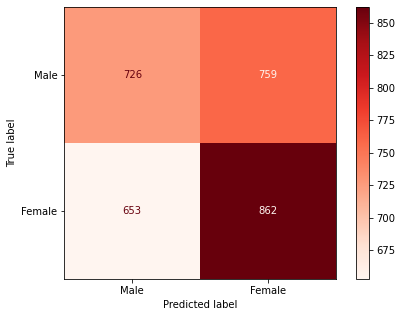

In [122]:
# Logisitic Regression
fig, ax = plt.subplots(figsize=(7, 5))
ConfusionMatrixDisplay.from_estimator(log_gs,
                                      X_test,
                                      y_test,
                                      display_labels=['Male', 'Female'], 
                                      cmap='Reds', 
                                      ax=ax);

In [123]:
# ROC Accuracy score
print('Logistic Regression')
print(roc_auc_score(y_test, log_gs.predict(X_test)))

Logistic Regression
0.5289328932893289


In [ ]:
print('Logistic Regression')
print(log_gs.best_score_)
print(log_gs.best_params_)
print('SVM: Linear SVC')
print(gs_svm.best_score_)
print(gs_svm.best_params_)
print('SVM: C-Support Vector Classification')
print(gs_svc.best_score_)
print(gs_svc.best_params_)

In [ ]:
# Accuracy score
print('Logistic Regression')
print(accuracy_score(y_test, log_gs.predict(X_test)))
print('SVM: Linear SVC')
print(accuracy_score(y_test, gs_svm.predict(X_test)))
print('SVM: C-Support Vector Classification')
print(accuracy_score(y_test, gs_svc.predict(X_test)))

In [ ]:
# Precision score
print('Logistic Regression')
print(precision_score(y_test, log_gs.predict(X_test)))
print('SVM: Linear SVC')
print(precision_score(y_test, gs_svm.predict(X_test)))
print('SVM: C-Support Vector Classification')
print(precision_score(y_test, gs_svc.predict(X_test)))

In [ ]:
# Recall score
print('Logistic Regression')
print(recall_score(y_test, log_gs.predict(X_test)))
print('SVM: Linear SVC')
print(recall_score(y_test, gs_svm.predict(X_test)))
print('SVM: C-Support Vector Classification')
print(recall_score(y_test, gs_svc.predict(X_test)))

In [ ]:
# Specificity score
print('Logistic Regression')
print(recall_score(y_test, log_gs.predict(X_test), pos_label=0))
print('SVM: Linear SVC')
print(recall_score(y_test, gs_svm.predict(X_test), pos_label=0))
print('SVM: C-Support Vector Classification')
print(recall_score(y_test, gs_svc.predict(X_test), pos_label=0))

In [ ]:
# F1 score
print('Logistic Regression')
print(f1_score(y_test, log_gs.predict(X_test)))
print('SVM: Linear SVC')
print(f1_score(y_test, gs_svm.predict(X_test)))
print('SVM: C-Support Vector Classification')
print(f1_score(y_test, gs_svc.predict(X_test)))

In [124]:
print(y_train.mean(), y_test.mean())

1.504857142857143 1.505


In [125]:
y_test.sum()/y_test.count()

1.505

In [126]:
y_test.value_counts(normalize=True)

2    0.505
1    0.495
Name: SEX, dtype: float64

## Answer Problem, Conclusions, and Recommendations

__Answer based on the following conclusions:__ Overall, the Logistic Regression model was the best model to identify Service Dogs vs Dog Training Subreddits. The SVM: C-Support Vector Classification model could also be used since it was very close in a lot of ways also. 

| Variable | Model                                | Best Score (gridsearch) | Train Score       | Test Score        | Accuracy          | ROC Accuracy      | Precision         | Recall            | Specificity       | F1 Score          |
|----------|--------------------------------------|-------------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
| gs       | Random Forest Classifier             | 0.952763058289175       | 1.000000000000000 | 0.953020134228187 | 0.953020134228187 | 0.953012220770418 | 0.946453407510431 | 0.960479887085391 | 0.945544554455445 | 0.953415061295972 |
| tree_gs  | Decision Tree Classifier             | 0.953217259651779       | 1.000000000000000 | 0.949134581419993 | 0.949134581419993 | 0.949132278385616 | 0.947294448348559 | 0.951305575158786 | 0.946958981612447 | 0.949295774647887 |
| log_gs   | Logistic Regression                  | 0.965480696442089       | 0.999848599545798 | 0.967855881314023 | 0.967855881314023 | 0.967844989963256 | 0.958506224066390 | 0.978122794636556 | 0.957567185289957 | 0.968215158924205 |
| gs_svm   | SVM: Linear SVC                      | 0.960938682816048       | 1.000000000000000 | 0.962910632285411 | 0.962910632285411 | 0.962901981296022 | 0.955555555555555 | 0.971065631616090 | 0.954738330975954 | 0.963248162408120 |
| gs_svc   | SVM: C-Support Vector Classification | 0.899621498864496       | 0.933080999242997 | 0.914517838219710 | 0.914517838219710 | 0.914575387370373 | 0.965162311955661 | 0.860268172194777 | 0.968882602545968 | 0.909701492537313 |

In [ ]:
# Difference between the Train Score and Test Score of the SVM: C-Support Vector Classification 
0.933080999242997 - 0.914517838219710

In [ ]:
# Difference between the Train Score and Test Score of the Logistic Regression model
0.999848599545798 - 0.967855881314023

### Findings

__Bias/Variance Tradeoff__ All of the models were overfit where the train score was higher than the test score. The *Logistic Regression* model was the least overfit and performed the best in the tradeoff because it had the highest train/test scores. The *SVM: C-Support Vector Classification* was a close second because the difference between the train and test scores was the lowest. <br>  

__Accuracy__ Number of correct predictions divided by the total number of predications, multiplied by 100 to get percentage: *Logistic Regression* had the best accuracy because it predicted the correct Subreddit 96.7% of the time. This is a reliable indicator because of the basically even class distribution.<br>

__Precision__ Number of true positives divided by the number of true positives plus the false positives: *SVM: C-Support Vector Classification* had the best precision with 96.1% precisely predicted the correct Subreddit. This is not the best indicator because of the even class distribution. Precision in this situation is showing us how many submissions that were predicted as being correct and actually were correct.<br>

__Recall__ Fraction of samples from a class which are correctly predicted by the model: *Logistic Regression* had the best recall because of the correctly labeled Subreddits, the model predicted 97.8% correct. <br>

__Specificity__ Fraction of samples from a class which are incorrectly predicted as incorrect (True negative rate): *SVM: C-Support Vector Classification* had the best recall because of the incorrectly labeled Subreddits, the model predicted those correctly incorrect at 96.8%. This is not a reliable indicator in this specific situation. <br>

__F1 Score__ Combination of precision and recall to check on the balance of the two: *Logistic Regression* has the highest F1 Score, so therefore, is the most balanced of the models.

In [ ]:
# Plot Roc Curve for Logistic Regression
plot_roc_curve(log_gs, X_test, y_test);

In [ ]:
# Plot Roc Curve for Logistic Regression
plot_roc_curve(gs_svc, X_test, y_test);

### Recommendations

__Implications__ Even though the Logistic Regression model was the most accurate at predicting the difference between the Service Dogs and Dog Training Subreddits, the classifications offered little to help predict training opportunities for service and other dogs. Classification opportunities could be to look more into the most common words and compare the differences between each Subreddit. <br>

__Next Steps__ Specifically looking for training theories and pedagogy related words could be a valuable opportunity in the future.


## Sources

https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce